Lets preprocess the Dataset

In [33]:
import pandas as pd

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']


user_logs = pd.read_csv('user1_log.txt', sep='|', header=None, names=columns)


user_logs['Time'] = user_logs['Time'].str.replace(' a.m.', '', regex=False).str.replace(' p.m.', '', regex=False)


user_logs['Timestamp'] = pd.to_datetime(
    user_logs['Date'] + ' ' + user_logs['Time'], 
    format='%d/%m/%Y %H:%M:%S',  
    errors='coerce'  
)

user_logs.drop(['Date', 'Time'], axis=1, inplace=True)

user_logs['Label'] = 0
user_logs.to_csv('User_log_in_csv_format.csv', index=False)

print(user_logs.head())


   ID  Session_ID  Depth       Path  Label           Timestamp
0   0    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
1   1    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
2   2    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
3   3    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
4   4    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04


Create a Graph Representations
- In this the Node will represent the directories/file accessed(0,1,2,etc)
- Edges: Represents the transition between the nodes

Attributes:
- Frequency
- Depth
- TimeStamps

In [38]:
import networkx as nx
G = nx.DiGraph()
    
for _, row in user_logs.iterrows():
    path_nodes = row['Path'].split('\\') 
    for i in range(len(path_nodes) - 1):
        src = path_nodes[i]
        dst = path_nodes[i + 1]
        if G.has_edge(src, dst):
            G[src][dst]['frequency'] += 1
        else:
            G.add_edge(src, dst, frequency=1, depth=row['Depth'], timestamp=row['Timestamp'])

Extract the features for the edges

In [39]:
import numpy as np

for u, v in user_graph.edges():
    timestamps = [user_graph[u][v]['timestamp']]
    time_diffs = [timestamps[i + 1] - timestamps[i] for i in range(len(timestamps) - 1)]
    user_graph[u][v]['avg_time_diff'] = np.mean(time_diffs).total_seconds() if time_diffs else None
    user_graph[u][v]['frequency'] = user_graph[u][v]['frequency']

In [34]:
for u,v,data in user_graph.edges(data = True):
    print(f"Edge ({u} -> {v}): ")
    for key, value in data.items():
        print(f" {key}: {value}")
    print()


Edge (0 -> 1): 
 frequency: 274052
 depth: 4
 timestamp: 2012-02-14 10:22:04
 avg_time_diff: None

Edge (1 -> 2): 
 frequency: 274052
 depth: 4
 timestamp: 2012-02-14 10:22:04
 avg_time_diff: None

Edge (2 -> 3): 
 frequency: 247867
 depth: 4
 timestamp: 2012-02-14 10:22:04
 avg_time_diff: None

Edge (2 -> 12): 
 frequency: 26185
 depth: 3
 timestamp: 2012-02-14 10:22:16
 avg_time_diff: None

Edge (3 -> 4): 
 frequency: 35258
 depth: 4
 timestamp: 2012-02-14 10:22:04
 avg_time_diff: None

Edge (3 -> 7): 
 frequency: 12837
 depth: 5
 timestamp: 2012-02-14 10:22:09
 avg_time_diff: None

Edge (3 -> 8): 
 frequency: 5648
 depth: 5
 timestamp: 2012-02-14 10:22:09
 avg_time_diff: None

Edge (3 -> 9): 
 frequency: 410
 depth: 4
 timestamp: 2012-02-14 10:22:10
 avg_time_diff: None

Edge (3 -> 10): 
 frequency: 415
 depth: 4
 timestamp: 2012-02-14 10:22:10
 avg_time_diff: None

Edge (3 -> 11): 
 frequency: 413
 depth: 4
 timestamp: 2012-02-14 10:22:10
 avg_time_diff: None

Edge (3 -> 14): 
 fre

Visualization of the Graph

In [25]:
subset_logs = user_logs.head(100)
subset_graph = construct_graph(subset_logs)


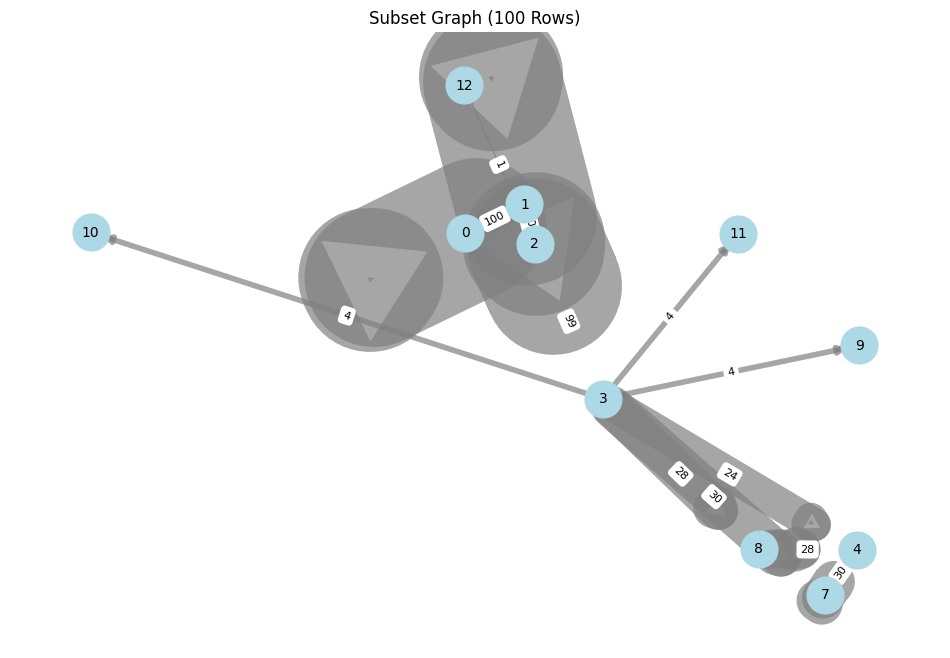

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def construct_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        path_nodes = row['Path'].split('\\') 
        for i in range(len(path_nodes) - 1):
            src = path_nodes[i]
            dst = path_nodes[i + 1]
            if G.has_edge(src, dst):
                G[src][dst]['frequency'] += 1
            else:
                G.add_edge(src, dst, frequency=1, depth=row['Depth'], timestamp=row['Timestamp'])
    return G

def visualize_graph(G, title="Graph Visualization"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
    edge_widths = [G[u][v]['frequency'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    edge_labels = {(u, v): G[u][v]['frequency'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title(title)
    plt.axis("off")
    plt.show()

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']
user_logs = pd.read_csv('user1_log.txt', sep='|', header=None, names=columns)

user_logs['Time'] = user_logs['Time'].str.replace('.', '', regex=False)
user_logs['Timestamp'] = pd.to_datetime(user_logs['Date'] + ' ' + user_logs['Time'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')

subset_logs = user_logs.head(100)

subset_graph = construct_graph(subset_logs)

visualize_graph(subset_graph, title="Subset Graph (100 Rows)")
